## Forest and dense Short Vegetation distribution in tunisia under current (1970-2000) and future climate 2041-2060 

# 1- Importing Libraries

In [1]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
np.random.seed(1234)
import pandas as pd # type: ignore
import matplotlib.colors as mcolors # type: ignore
from matplotlib.colors import ListedColormap # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
import seaborn as sns # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, precision_recall_fscore_support, ConfusionMatrixDisplay,accuracy_score,roc_auc_score
from sklearn.preprocessing import label_binarize

In [2]:
import os
os.environ['PYTHONHASHSEED'] = str(1234)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)


# 2-Data reading and processing

     2-1 Processing current data

In [3]:
path="C:/Users/maale/OneDrive/Bureau/pre/base_de_donnée/base_de_donnée_finale.xlsx"
file="base_de_donnée_finale.csv"
df = pd.read_excel(path)


In [4]:
df.head()

,id,X,Y,Unnamed: 3,wclim_act_bio1,wclim_act_bio2,wclim_act_bio3,wclim_act_bio4,wclim_act_bio5,wclim_act_bio6,...,wclim_act_bio11,wclim_act_bio12,wclim_act_bio13,wclim_act_bio14,wclim_act_bio15,wclim_act_bio16,wclim_act_bio17,wclim_act_bio18,wclim_act_bio19,GLAD2019
0,1,7.5375,37.55417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,7.5375,37.54583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,7.5375,37.53750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,7.5375,37.52917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,7.5375,37.52083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
columns=['X', 'Y', 'wclim_act_bio1', 'wclim_act_bio2', 'wclim_act_bio3',
       'wclim_act_bio4', 'wclim_act_bio5', 'wclim_act_bio6', 'wclim_act_bio7',
       'wclim_act_bio8', 'wclim_act_bio9', 'wclim_act_bio10',
       'wclim_act_bio11', 'wclim_act_bio12', 'wclim_act_bio13',
       'wclim_act_bio14', 'wclim_act_bio15', 'wclim_act_bio16',
       'wclim_act_bio17', 'wclim_act_bio18', 'wclim_act_bio19', 'GLAD2019']
df=df[columns]

Eliminate rows with missing values

In [6]:
df.shape

(428464, 22)

In [7]:
df.dropna(inplace=True)
df.head()
print(df.shape)
print(df.columns)

(349403, 22)
Index(['X', 'Y', 'wclim_act_bio1', 'wclim_act_bio2', 'wclim_act_bio3',
       'wclim_act_bio4', 'wclim_act_bio5', 'wclim_act_bio6', 'wclim_act_bio7',
       'wclim_act_bio8', 'wclim_act_bio9', 'wclim_act_bio10',
       'wclim_act_bio11', 'wclim_act_bio12', 'wclim_act_bio13',
       'wclim_act_bio14', 'wclim_act_bio15', 'wclim_act_bio16',
       'wclim_act_bio17', 'wclim_act_bio18', 'wclim_act_bio19', 'GLAD2019'],
      dtype='object')


     X : Latitude
     Y : Longitude
    'wclim_act_bio1': Annual Mean Temperature
    'Bwclim_act_bio2': Mean Diurnal Range (Mean of monthly (max temp - min temp))
    'wclim_act_bio3': Isothermality  
    'wclim_act_bio4': Temperature Seasonality 
    'wclim_act_bio5': 'Max Temperature of Warmest Month',  
    'wclim_act_bio6': 'Min Temperature of Coldest Month',  
    'wclim_act_bio7': 'Temperature Annual Range',  
    'wclim_act_bio8': 'Mean Temperature of Wettest Quarter',  
    'wclim_act_bio9': 'Mean Temperature of Driest Quarter',  
    'wclim_act_bio10': 'Mean Temperature of Warmest Quarter',  
    'wclim_act_bio11': 'Mean Temperature of Coldest Quarter', 
    'wclim_act_bio12': 'Annual Precipitation',  
    'wclim_act_bio13': 'Precipitation of Wettest Month',  
    'wclim_act_bio14': 'Precipitation of Driest Month',  
    'wclim_act_bio15': 'Precipitation Seasonality',  
    'wclim_act_bio16': 'Precipitation of Wettest Quarter',  
    'wclim_act_bio17': 'Precipitation of Driest Quarter',  
    'wclim_act_bio18': 'Precipitation of Warmest Quarter',  
    'wclim_act_bio19': 'Precipitation of Coldest Quarter'  
    'GLAD2019' : forestation class

In [8]:
distinct_values = df['GLAD2019'].value_counts()
print(distinct_values)

GLAD2019
0     131690
1     125915
2      46070
17     26255
3      10469
18      2811
4       2564
8       2134
16       887
5        329
9        147
10        56
6         41
12        23
7          6
11         5
13         1
Name: count, dtype: int64


groupping all 19 classes into 3 classes only

    "0" : others

    "1" : deforestation
    
     "2" : culture

In [9]:
df.loc[df['GLAD2019'].isin([0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 16, 18]), 'GLAD2019'] = 0
df.loc[df['GLAD2019'].isin([3, 4, 5]), 'GLAD2019'] = 1
df.loc[df['GLAD2019'].isin([17]), 'GLAD2019'] = 2

distinct_values = df['GLAD2019'].value_counts()
print(distinct_values)

GLAD2019
0    309786
2     26255
1     13362
Name: count, dtype: int64


Visualisation of actual forestation

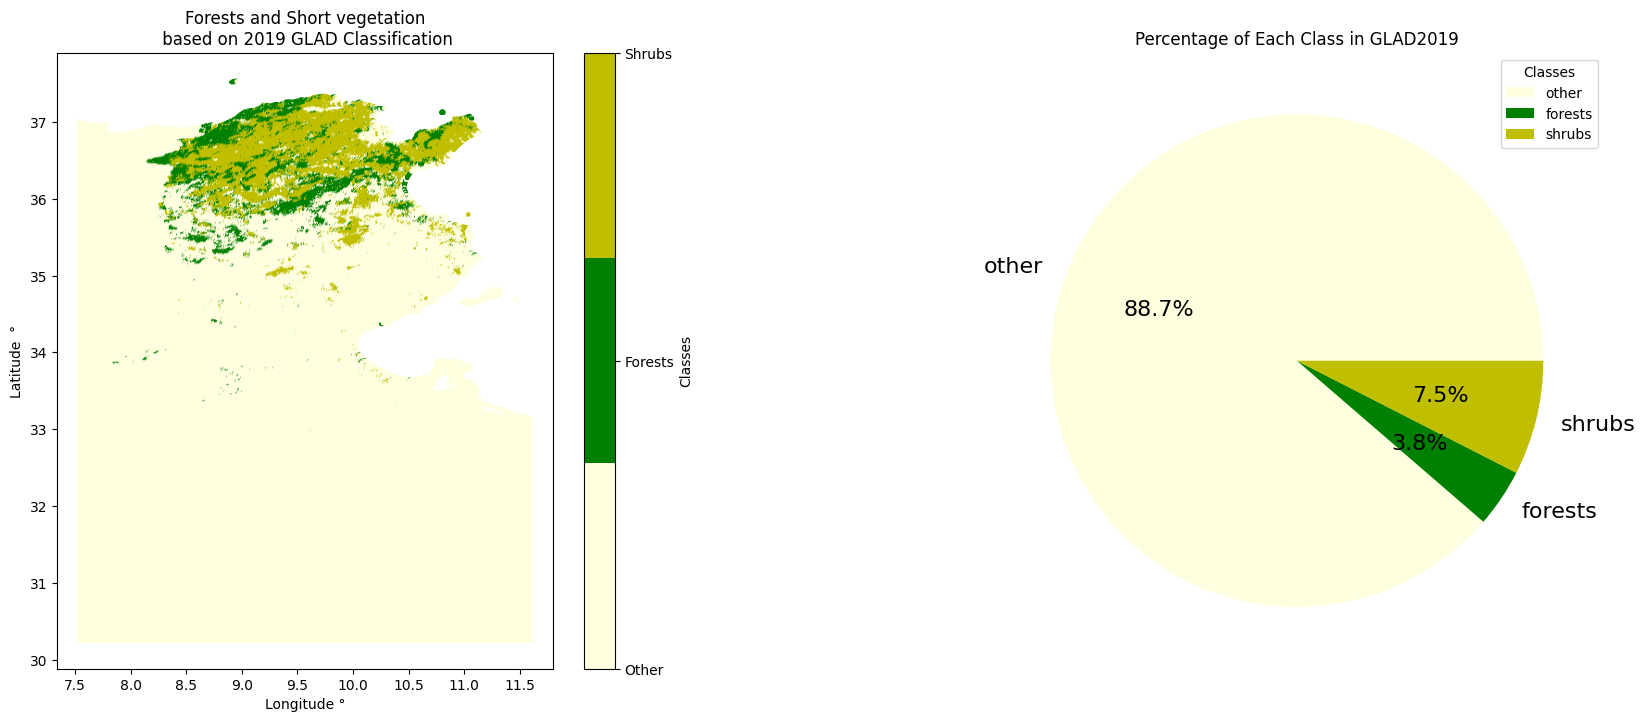

In [10]:


# Supposons que 'df' soit votre DataFrame et 'GLAD2019' soit la colonne d'intérêt
# df = pd.DataFrame(...)  # Votre DataFrame

# Définir les couleurs pour chaque classe
colors = ['lightyellow', 'green', 'y']  # lightyellow for 'other', green for 'forests', y for 'cropland'

# Colormap definitions
cmapClassForestsandShortV = ListedColormap(colors)

# Créer la figure avec des sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
plt.subplots_adjust(wspace=0.5)  # Ajuster l'espacement entre les sous-graphiques

# Sous-graphique 1 : Scatter plot
scatter = ax1.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV, s=5)
cbar = plt.colorbar(scatter, ax=ax1, ticks=[0, 1, 2], label='Classes')
cbar.ax.set_yticklabels(['Other', 'Forests', 'Shrubs'])
ax1.set_xlabel('Longitude °')
ax1.set_ylabel('Latitude  °')
ax1.set_title('Forests and Short vegetation\n based on 2019 GLAD Classification')

# Sous-graphique 2 : Pie chart
class_counts = df['GLAD2019'].value_counts().sort_index()  # Assurez-vous que les classes sont dans le bon ordre
class_percentages = class_counts / class_counts.sum() * 100
labels = ['other', 'forests', 'shrubs']  # Assurez-vous que ces étiquettes correspondent à l'ordre des classes dans 'class_counts'

# Augmenter la taille des pourcentages dans le graphique en secteur et ajouter des étiquettes
ax2.pie(class_percentages, autopct='%1.1f%%', textprops={'fontsize': 16}, labels=labels, colors=colors)
ax2.set_title('Percentage of Each Class in GLAD2019')
ax2.legend(labels, title='Classes')

plt.show()


Histogramm showing the percentage of each class in the GLAD2019

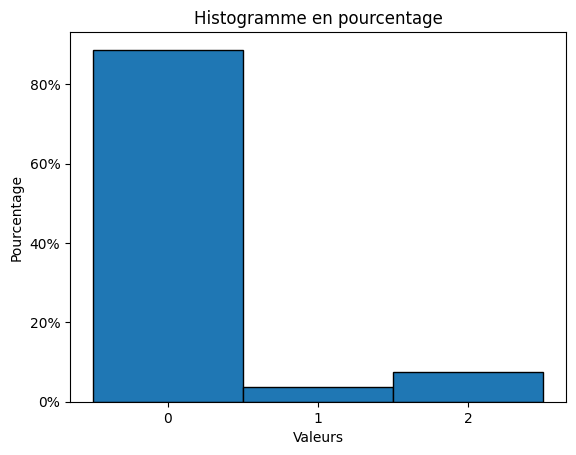

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous que toutes les classes de 0 à 2 sont représentées
bins = np.arange(0, 4) - 0.5  # 3 classes de 0 à 2, avec des bords décalés pour les inclure

# Création de l'histogramme
plt.hist(df['GLAD2019'], bins=bins, weights=[1/len(df['GLAD2019'])]*len(df['GLAD2019']), edgecolor='black')

# Ajuster l'axe x pour qu'il affiche les classes entières
plt.xticks(range(0, 3))

# Ajouter des étiquettes
plt.xlabel('Valeurs')
plt.ylabel('Pourcentage')
plt.title('Histogramme en pourcentage')

# Convertir en pourcentage sur l'axe des ordonnées
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Afficher le graphique
plt.show()



Correlation matrix to see dependence among variables

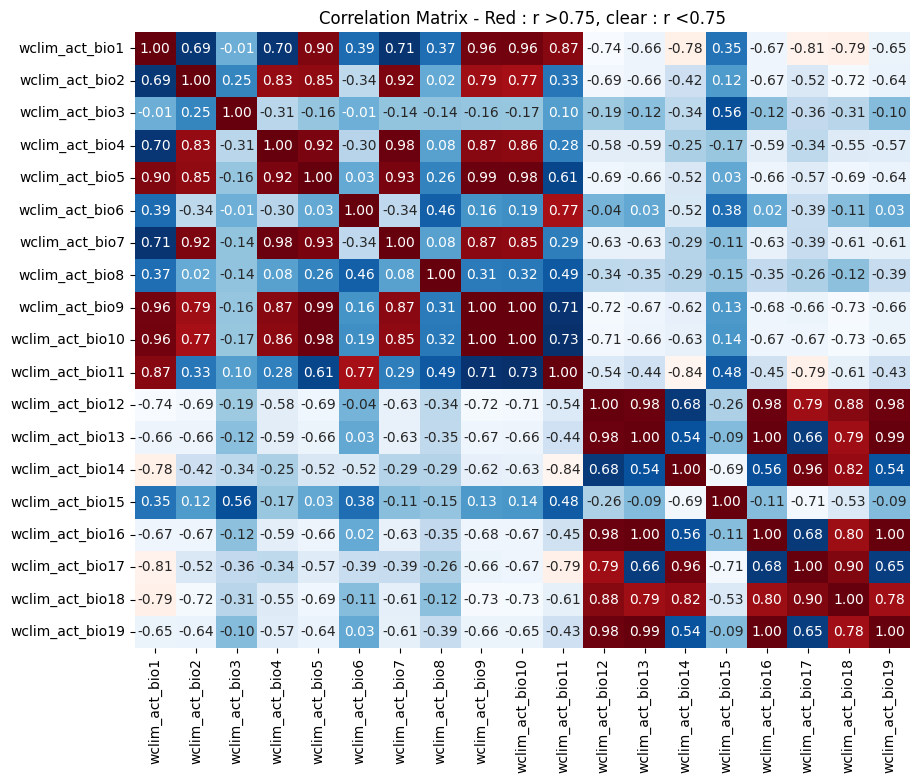

In [12]:
df_corr=df.filter(like='wclim_')
corr_matrix = df_corr.corr()
mask_high = np.abs(corr_matrix) >= 0.75
mask_low = np.abs(corr_matrix) < 0.75
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Reds', mask=mask_low, cbar=False)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', mask=mask_high, cbar=False)
plt.title('Correlation Matrix - Red : r >0.75, clear : r <0.75')
plt.show()


choosing the least correlated variables

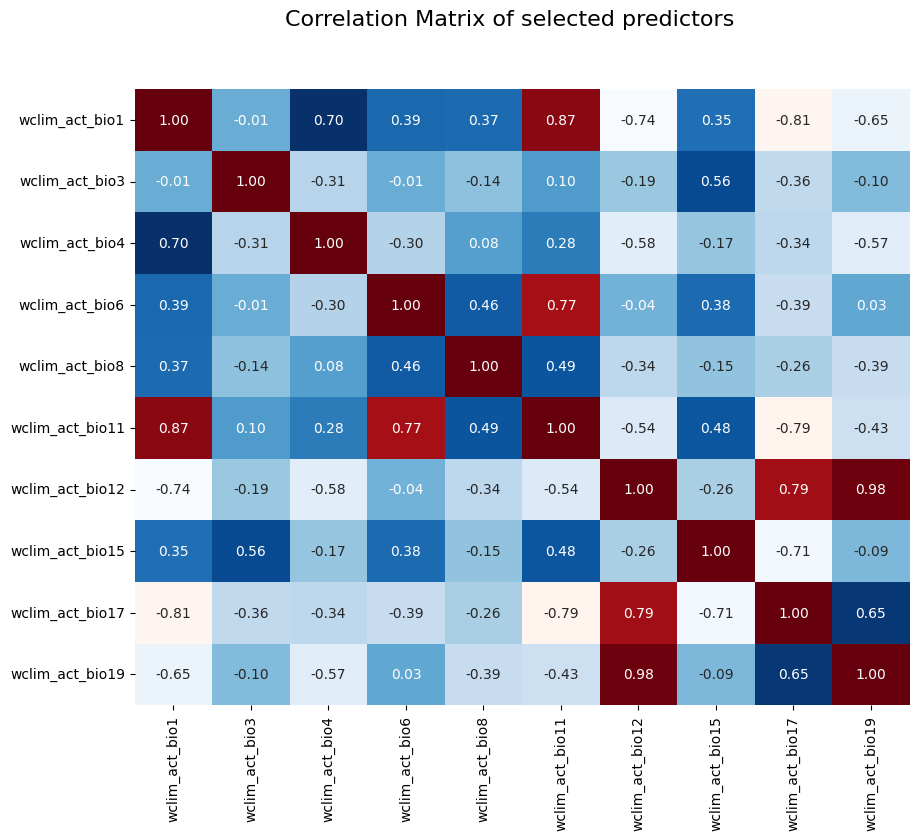

In [13]:
Predictors_Selected=df[['wclim_act_bio1','wclim_act_bio3', 'wclim_act_bio4','wclim_act_bio6','wclim_act_bio8','wclim_act_bio11','wclim_act_bio12','wclim_act_bio15','wclim_act_bio17','wclim_act_bio19']]

corr_matrix = Predictors_Selected.corr()
mask_high = np.abs(corr_matrix) >= 0.75
mask_low = np.abs(corr_matrix) < 0.75
fig=plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Reds', mask=mask_low, cbar=False)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', mask=mask_high, cbar=False)
fig.suptitle('Correlation Matrix of selected predictors',fontsize=16)
plt.show()

The least correlated variables are 3, 4, 6, 8, 11, 15, 17, and 19. Additionally, we have included variables 1 and 12, which represent the annual mean temperature and precipitation, respectively. These two variables are easy to interpret and important for vegetation in Tunisia.

Making a new dataset containing only the selected variables with less correlation values

In [14]:
new_columns=['X','Y','wclim_act_bio1','wclim_act_bio3', 'wclim_act_bio4','wclim_act_bio6','wclim_act_bio8','wclim_act_bio11','wclim_act_bio12','wclim_act_bio15','wclim_act_bio17','wclim_act_bio19','GLAD2019']
df_new=df[new_columns]
df_new.head()

,X,Y,wclim_act_bio1,wclim_act_bio3,wclim_act_bio4,wclim_act_bio6,wclim_act_bio8,wclim_act_bio11,wclim_act_bio12,wclim_act_bio15,wclim_act_bio17,wclim_act_bio19,GLAD2019
65,7.5375,37.01250,17.062500,38.952599,491.380829,7.4,12.966666,11.650000,906.0,75.037483,29.0,446.0,0
66,7.5375,37.00417,16.362499,38.452915,506.732513,6.6,12.083334,10.766666,953.0,74.175758,30.0,469.0,0
67,7.5375,36.99583,15.812500,38.194443,519.808228,5.9,10.066667,10.066667,999.0,72.738220,31.0,487.0,0
68,7.5375,36.98750,15.325000,38.002872,532.688293,5.3,9.416667,9.416667,1043.0,71.847206,34.0,506.0,0
69,7.5375,36.97917,15.150000,38.176640,538.204102,5.1,9.183333,9.183333,1061.0,71.602753,34.0,514.0,0


In [15]:
X = df[new_columns[:-1]]
print(X.shape)
y=df['GLAD2019']
X.columns = X.columns.str.replace('wclim_act_bio', 'BIO_')


(349403, 12)


In [16]:
print(X.describe())

                  X              Y          BIO_1          BIO_3  \
count  349403.00000  349403.000000  349403.000000  349403.000000   
mean        9.36201      33.448218      20.160296      39.391965   
std         1.08353       1.982686       2.505628       1.926026   
min         7.53750      30.245830      11.475000      27.117115   
25%         8.44583      31.729170      18.500000      38.118279   
50%         9.33750      33.229170      20.154167      39.189976   
75%        10.20417      35.187500      22.291666      40.325340   
max        11.59583      37.537500      24.245832      46.175800   

               BIO_4          BIO_6          BIO_8         BIO_11  \
count  349403.000000  349403.000000  349403.000000  349403.000000   
mean      727.647350       4.798335      13.704778      11.277793   
std        89.565574       1.403386       2.811277       1.697759   
min       486.509491      -1.400000       4.183333       3.333333   
25%       660.123077       4.100000      1

     2.2   processing future data


In [17]:
path1="C:/Users/maale/OneDrive/Bureau/pre/base_de_donnée/base_donnée_futur.xlsx"
df_futur=pd.read_excel(path1)
df_futur.head()
df_futur.describe()

,id,X,Y,BIO_1,BIO_2,BIO_3,BIO_4,BIO_5,BIO_6,BIO_7,...,BIO_10,BIO_11,BIO_12,BIO_13,BIO_14,BIO_15,BIO_16,BIO_17,BIO_18,BIO_19
count,428464.000000,428464.000000,428464.000000,349403.000000,349403.000000,349403.000000,349403.000000,349403.000000,349403.000000,349403.000000,...,349403.000000,349403.000000,349403.000000,349403.000000,349403.000000,349403.000000,349403.000000,349403.000000,349403.000000,349403.000000
mean,214232.500000,9.566667,33.900000,22.954513,13.323952,38.418618,770.899651,41.448634,6.728786,34.719848,...,32.562737,13.756360,193.958349,31.937888,2.117852,57.065888,79.490359,12.185949,16.117380,70.673841
std,123687.047207,1.173944,2.112141,2.579503,1.439097,1.735467,87.059229,3.631113,1.390542,3.864770,...,3.226625,1.747372,192.006938,32.013968,3.537728,12.806773,84.748527,15.442448,18.761415,83.379016
min,1.000000,7.537500,30.245830,14.300000,5.300000,26.500000,532.500000,31.100000,0.700000,19.799999,...,23.900000,5.800000,27.000000,6.000000,0.000000,23.500000,12.000000,0.000000,0.000000,10.000000
25%,107116.750000,8.552085,32.070830,21.299999,12.400000,37.200001,700.799988,38.500000,5.900000,32.200001,...,29.900000,12.900000,58.000000,11.000000,0.000000,50.200001,24.000000,2.000000,2.000000,21.000000
50%,214232.500000,9.566665,33.900000,22.900000,13.400000,38.200001,769.000000,40.700001,6.900000,34.400002,...,31.900000,14.300000,114.000000,23.000000,0.000000,58.700001,49.000000,2.000000,4.000000,40.000000
75%,321348.250000,10.581252,35.729170,25.200001,14.600000,39.299999,846.099976,44.900002,7.500000,38.200001,...,35.700001,14.900000,265.000000,36.000000,4.000000,66.500000,97.000000,22.000000,31.000000,76.000000
max,428464.000000,11.595830,37.554170,27.200001,15.900000,44.500000,918.299988,47.599998,12.200000,40.799999,...,38.200001,16.299999,1326.000000,221.000000,17.000000,92.400002,598.000000,61.000000,79.000000,582.000000


In [18]:
df_futur.dropna(inplace=True)
print(df_futur.columns)
print(df_futur.shape)
df_futur.head()


Index(['id', 'X', 'Y', 'BIO_1', 'BIO_2', 'BIO_3', 'BIO_4', 'BIO_5', 'BIO_6',
       'BIO_7', 'BIO_8', 'BIO_9', 'BIO_10', 'BIO_11', 'BIO_12', 'BIO_13',
       'BIO_14', 'BIO_15', 'BIO_16', 'BIO_17', 'BIO_18', 'BIO_19'],
      dtype='object')
(349403, 22)


,id,X,Y,BIO_1,BIO_2,BIO_3,BIO_4,BIO_5,BIO_6,BIO_7,...,BIO_10,BIO_11,BIO_12,BIO_13,BIO_14,BIO_15,BIO_16,BIO_17,BIO_18,BIO_19
65,66,7.5375,37.01250,19.600000,9.2,38.799999,543.200012,33.200001,9.6,23.600000,...,26.799999,13.8,851.0,182.0,4.0,80.900002,456.0,25.0,46.0,430.0
66,67,7.5375,37.00417,18.900000,9.2,38.299999,558.599976,32.900002,8.8,24.100000,...,26.299999,12.9,894.0,188.0,4.0,79.800003,473.0,26.0,47.0,451.0
67,68,7.5375,36.99583,18.299999,9.4,38.200001,572.299988,32.700001,8.1,24.600000,...,25.900000,12.3,935.0,192.0,4.0,78.400002,488.0,27.0,48.0,467.0
68,69,7.5375,36.98750,17.900000,9.5,38.000000,585.299988,32.500000,7.5,25.000000,...,25.600000,11.6,975.0,197.0,4.0,77.099998,501.0,30.0,50.0,484.0
69,70,7.5375,36.97917,17.700001,9.6,38.200001,590.799988,32.500000,7.3,25.200001,...,25.500000,11.4,991.0,199.0,4.0,76.800003,507.0,30.0,51.0,491.0


In [19]:
new_columns_fut=['X', 'Y', 'BIO_1','BIO_3', 'BIO_4', 'BIO_6', 'BIO_8', 'BIO_11','BIO_12', 'BIO_15', 'BIO_17', 'BIO_19']
df2=df_futur[new_columns_fut]

print(df2.shape)
print(df2.columns)

(349403, 12)
Index(['X', 'Y', 'BIO_1', 'BIO_3', 'BIO_4', 'BIO_6', 'BIO_8', 'BIO_11',
       'BIO_12', 'BIO_15', 'BIO_17', 'BIO_19'],
      dtype='object')


split data into training set and test set using train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

we need to scale X because for example as shown in X.describe() wclim_act_bio3 ranges from 27 to 46 and wclim_act_bio4 ranges from 486 to 885 

the standard scaler performs z normalisation which Standardize the features by removing the mean and scaling to unit variance.

The standard score of a sample \( x \) is calculated as follows:

    z= (x−μ)/σ


​
 



where μ is the mean of the training samples or zero if `with_mean=False`, and σ is the standard deviation of the training samples or one if `with_std=False`.

In [21]:
from sklearn.preprocessing import StandardScaler # type: ignore
# Assuming 'inputs' is the input data
scaler = StandardScaler()
# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler.fit_transform(X_train)


In [22]:
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)
X_fut_scaled = scaler.transform(df2)

     To resolve the problem of unbalenced data we need to perform random  Undersampling  for training data : it consists of retrieving a random sample from the majority class in order to decrease its proportion to balance the weights 

In [23]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Initialisez le sous-échantillonneur
rus = RandomUnderSampler(sampling_strategy={0: 20000, 1: 10690, 2: 21004},random_state=42)

# Appliquez le sous-échantillonnage
X_train_sc_us, y_train_us = rus.fit_resample(X_train_scaled, y_train)
X_train_us, y_train_us2 = rus.fit_resample(X_train, y_train)
# Affichez les nouvelles proportions des classes
print('Distribution des classes avant sous-échantillonnage :', np.bincount(y_train))
print('Distribution des classes après sous-échantillonnage :', np.bincount(y_train_us))
# Maintenant, vous pouvez utiliser X_train_resampled et y_train_resampled pour entraîner votre modèle


Distribution des classes avant sous-échantillonnage : [247828  10690  21004]
Distribution des classes après sous-échantillonnage : [20000 10690 21004]


In [24]:
from collections import Counter

# Count the number of instances for each class
class_counts = Counter(y_train_us)

# Calculate the total number of instances
total_count = sum(class_counts.values())

# Calculate the percentage for each class
class_percentages = {cls: (count / total_count) * 100 for cls, count in class_counts.items()}

# Print the results
print(f"Class distribution: {class_counts}")
print(f"Class percentages: {class_percentages}")


Class distribution: Counter({2: 21004, 0: 20000, 1: 10690})
Class percentages: {0: 38.68920957944829, 1: 20.67938252021511, 2: 40.6314079003366}


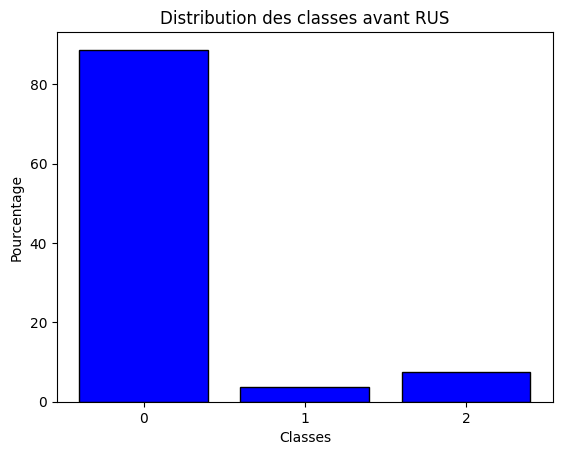

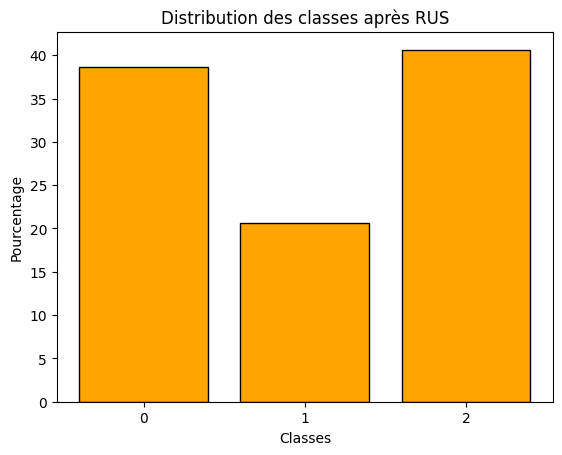

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Supposons que vous ayez y_train avant et après RUS
# y_train = [0, 0, 1, 1, 1, 2, 2, 2, 2]
# y_train_us = [0, 1, 1, 2, 2]

# Compter les occurrences avant RUS
class_counts_before = Counter(y_train)
total_count_before = sum(class_counts_before.values())
class_percentages_before = {cls: (count / total_count_before) * 100 for cls, count in class_counts_before.items()}

# Compter les occurrences après RUS
class_counts_after = Counter(y_train_us)
total_count_after = sum(class_counts_after.values())
class_percentages_after = {cls: (count / total_count_after) * 100 for cls, count in class_counts_after.items()}

# Préparer les données pour les histogrammes
classes = sorted(list(set(y_train) | set(y_train_us)))
percentages_before = [class_percentages_before.get(cls, 0) for cls in classes]
percentages_after = [class_percentages_after.get(cls, 0) for cls in classes]

# Création du premier histogramme (avant RUS)
fig, ax1 = plt.subplots()
bar1 = ax1.bar(classes, percentages_before, color='blue', edgecolor='black')

# Ajouter des étiquettes et un titre pour le premier histogramme
ax1.set_xlabel('Classes')
ax1.set_ylabel('Pourcentage')
ax1.set_title('Distribution des classes avant RUS')
ax1.set_xticks(classes)

# Afficher le premier graphique
plt.show()

# Création du deuxième histogramme (après RUS)
fig, ax2 = plt.subplots()
bar2 = ax2.bar(classes, percentages_after, color='orange', edgecolor='black')

# Ajouter des étiquettes et un titre pour le deuxième histogramme
ax2.set_xlabel('Classes')
ax2.set_ylabel('Pourcentage')
ax2.set_title('Distribution des classes après RUS')
ax2.set_xticks(classes)

# Afficher le deuxième graphique
plt.show()


True Test Skill function important for models validation later

In [26]:
# Calcul du True Skill Statistic (TSS)
def calculate_tss_multiclass(y_true, y_pred):
    classes = np.unique(y_true)
    tss_scores = []
    for cls in classes:
        y_true_bin = (y_true == cls).astype(int)
        y_pred_bin = (y_pred == cls).astype(int)
        
        tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin).ravel()
        
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        tss_scores.append(tss)
    
    return np.mean(tss_scores)

one hot encoding for GLAD2019 for classification models


In [27]:
#Application du one-hot encoding
y_train_one_hot = pd.get_dummies(y_train)
y_train_us_one_hot = pd.get_dummies(y_train_us)
y_test_one_hot = pd.get_dummies(y_test)
y_one_hot = pd.get_dummies(y)


# Renommage des colonnes
y_train_one_hot.columns = ['others', 'forests', 'culture']
y_train_us_one_hot.columns = ['others', 'forests', 'culture']
y_test_one_hot.columns = ['others', 'forests', 'culture']
y_one_hot.columns = ['others', 'forests', 'culture']


# Conversion des booléens en entiers
y_train_one_hot= y_train_one_hot.astype(int)
y_train_us_one_hot= y_train_us_one_hot.astype(int)
y_test_one_hot= y_test_one_hot.astype(int)
y_one_hot= y_one_hot.astype(int)


# 3-Testing different models

       3.1 SVM

Do the Grid search only one time to get the best parameters for SVM because it take much time to run

In [28]:
"""from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import loguniform

# Définition de la distribution des paramètres
param_dist = {
    'C': loguniform(0.01, 10),
    'gamma': loguniform(0.01, 10),
    'kernel': ['linear', 'rbf']
}

# Création du modèle SVM
svm = SVC(probability=True)

# Réduction du nombre d'itérations
n_iter_search = 20

# Création d'un échantillon des données d'entraînement avec stratification
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train_sc_us, y_train_us,  stratify=y_train_us, random_state=42)

# Vérification des classes dans y_train_sample
unique_classes = np.unique(y_train_sample)
print("Classes in y_train_sample:", unique_classes)

if len(unique_classes) > 1:
    # Recherche aléatoire avec validation croisée
    random_search = RandomizedSearchCV(
        svm,
        param_distributions=param_dist,
        n_iter=n_iter_search,
        refit=True,
        verbose=1,
        random_state=42,
        n_jobs=-1  # Utilisation de tous les cœurs disponibles
    )

    # Utilisation de l'échantillon réduit pour l'ajustement
    random_search.fit(X_train_sample, y_train_sample)

    # Affichage des meilleurs paramètres
    print("Best parameters found: ", random_search.best_params_)
else:
    print("The sample contains only one class. Adjust the sample to include more classes.")"""


'from sklearn.model_selection import train_test_split, RandomizedSearchCV\nfrom sklearn.svm import SVC\nfrom scipy.stats import loguniform\n\n# Définition de la distribution des paramètres\nparam_dist = {\n    \'C\': loguniform(0.01, 10),\n    \'gamma\': loguniform(0.01, 10),\n    \'kernel\': [\'linear\', \'rbf\']\n}\n\n# Création du modèle SVM\nsvm = SVC(probability=True)\n\n# Réduction du nombre d\'itérations\nn_iter_search = 20\n\n# Création d\'un échantillon des données d\'entraînement avec stratification\nX_train_sample, _, y_train_sample, _ = train_test_split(\n    X_train_sc_us, y_train_us,  stratify=y_train_us, random_state=42)\n\n# Vérification des classes dans y_train_sample\nunique_classes = np.unique(y_train_sample)\nprint("Classes in y_train_sample:", unique_classes)\n\nif len(unique_classes) > 1:\n    # Recherche aléatoire avec validation croisée\n    random_search = RandomizedSearchCV(\n        svm,\n        param_distributions=param_dist,\n        n_iter=n_iter_search,\

creating the SVM model

In [29]:

from sklearn.svm import SVC


# Paramètres optimaux trouvés
best_params = {
    'C': 2.1830968390524603,
    'gamma': 0.6173770394704572,
    'kernel': 'rbf'
}

# Création du modèle SVM avec les meilleurs paramètres
SVM = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], probability=True, random_state=42)


# Entraînement du modèle
SVM.fit(X_train_sc_us, y_train_us)





SVC(C=2.1830968390524603, gamma=0.6173770394704572, probability=True,
    random_state=42)

In [30]:
# Prédiction sur les données de test
y_pred = SVM.predict(X_test_scaled)


Confusion matrix and ROC curve for SVM

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     61958
           1       0.56      0.74      0.64      2672
           2       0.63      0.92      0.75      5251

    accuracy                           0.93     69881
   macro avg       0.73      0.87      0.79     69881
weighted avg       0.95      0.93      0.94     69881

Precision: [0.99705331 0.56237511 0.62923839]
Recall: [0.94478518 0.73727545 0.9188726 ]
F1 Score: [0.9702158  0.63805668 0.74696184]


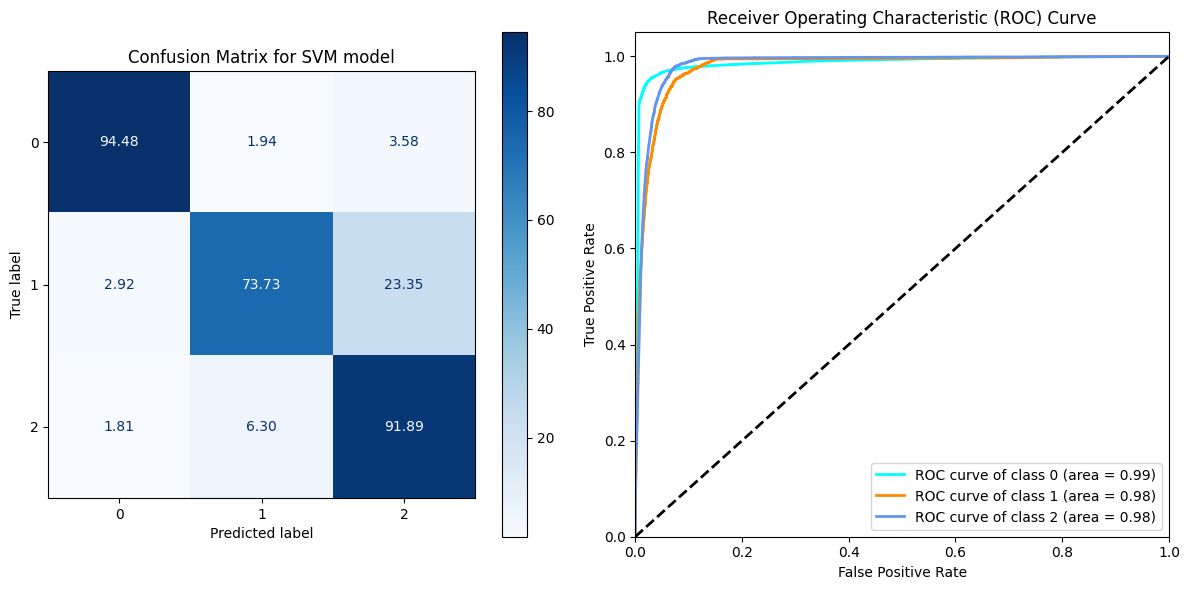

Macro-averaged Precision: 0.7295556044226282
Macro-averaged Recall: 0.8669777406177598
Macro-averaged F1 Score: 0.7850781060113455
Mean TSS: 0.8374332511929335


In [31]:
# Prédictions
y_test_predicted_us = SVM.predict_proba(X_test_scaled)  # Prédiction des probabilités pour ROC
y_test_predicted_us_classes = np.argmax(y_test_predicted_us, axis=1)

# Convert true labels to class indices
y_test_true_classes = y_test

# Calculate the confusion matrix
cm = confusion_matrix(y_test_true_classes, y_test_predicted_us_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Rapport de classification
report = classification_report(y_test_true_classes, y_test_predicted_us_classes, target_names=[str(i) for i in range(3)])
print("Classification Report:\n", report)

# Scores précision, rappel, F1 pour chaque classe
precision, recall, f1, _ = precision_recall_fscore_support(y_test_true_classes, y_test_predicted_us_classes)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Binarize the output labels for ROC
y_test_binarized = label_binarize(y_test_true_classes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_predicted_us[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, ax=axs[0], values_format='.2f')
axs[0].set_title('Confusion Matrix for SVM model')

# Plot ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")


plt.tight_layout()
plt.show()

# Calculate macro-average of precision, recall, and F1 score
precision_macro = np.mean(precision)
recall_macro = np.mean(recall)
f1_macro = np.mean(f1)

print("Macro-averaged Precision:", precision_macro)
print("Macro-averaged Recall:", recall_macro)
print("Macro-averaged F1 Score:", f1_macro)


# Calculate and print the mean TSS
tss = calculate_tss_multiclass(y_test_true_classes, y_test_predicted_us_classes)
print("Mean TSS:", tss)


Prediting actual distribution with SVM

In [32]:
y_pred=SVM.predict(X_scaled)
SVM.score(X_scaled, y)

0.9304613869943875

Text(0.5, 1.0, 'Forests and Short vegetation\n 2019 SVM model prediction')

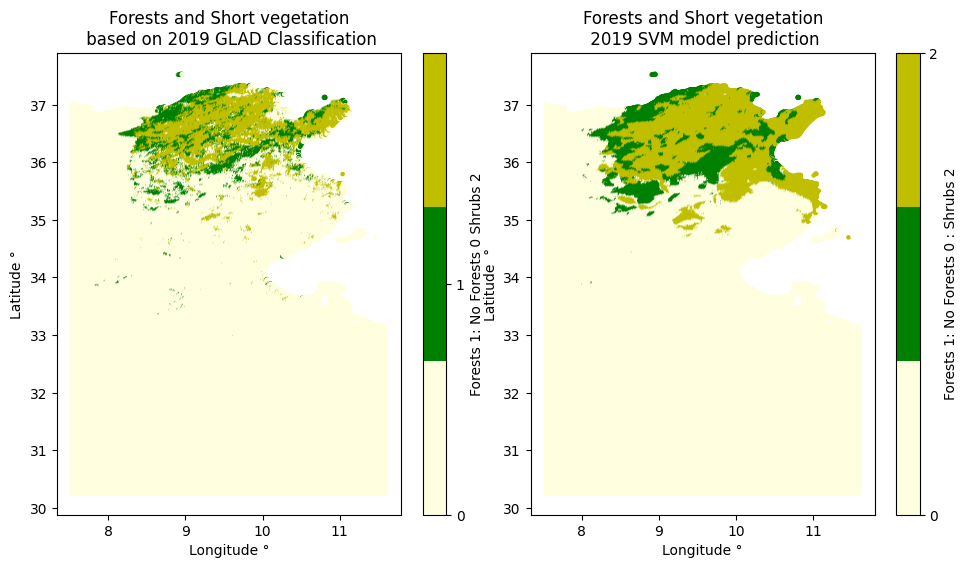

In [33]:
fig= plt.figure(figsize=(30, 6)) 
plt.subplots_adjust(wspace=0.1)  

cmapClassForests = ListedColormap(['lightyellow', 'green'])  # lightyellow for 0 (non-forest), Green for 1 (forest)
cmapClassForestsandShrubs = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for shrubs (in ESA WC only)
cmapClassForestsandShortV = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for short vegetation (in GLAD only)
cmapClassGLAD2010TreeCover= ListedColormap(['lightyellow','green'])  # lightyellow for 0 (non-forest), Green for 1 (open forest) and y for dense forest (There is no dense forests)
plt.subplot(1, 5, 1)
plt.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 1], label='Forests 1: No Forests 0 Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n based on 2019 GLAD Classification')



plt.subplot(1, 5, 2) 
plt.scatter(df2['X'], df2['Y'], c=y_pred, cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 2], label='Forests 1: No Forests 0 : Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude  °')
plt.title('Forests and Short vegetation\n 2019 SVM model prediction')

Predicting future distribution

In [34]:
y_fut_SVM=SVM.predict(X_fut_scaled)


Text(0.5, 1.0, 'Forests and Short vegetation\n 2041 SVM model prediction')

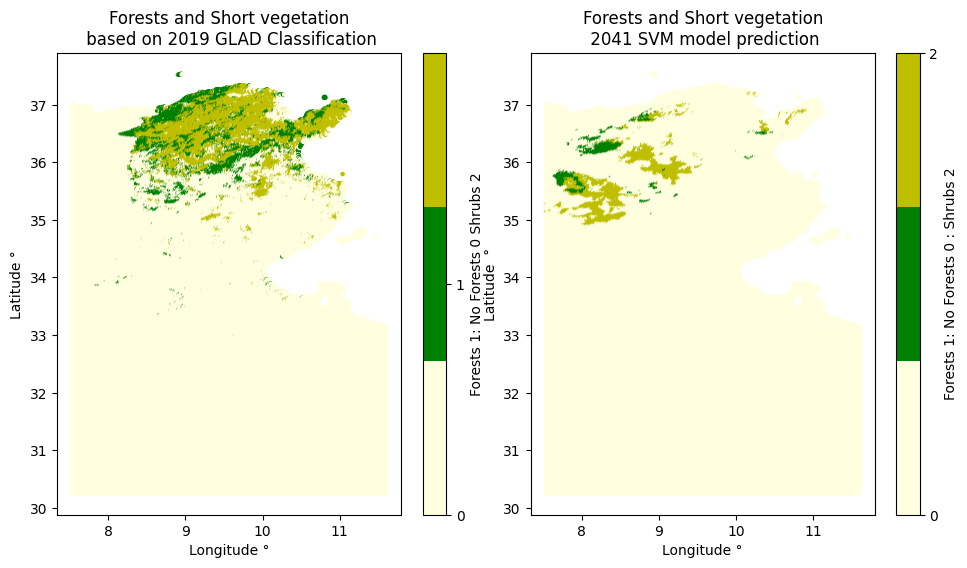

In [35]:
fig= plt.figure(figsize=(30, 6)) 
plt.subplots_adjust(wspace=0.1)  

cmapClassForests = ListedColormap(['lightyellow', 'green'])  # lightyellow for 0 (non-forest), Green for 1 (forest)
cmapClassForestsandShrubs = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for shrubs (in ESA WC only)
cmapClassForestsandShortV = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for short vegetation (in GLAD only)
cmapClassGLAD2010TreeCover= ListedColormap(['lightyellow','green'])  # lightyellow for 0 (non-forest), Green for 1 (open forest) and y for dense forest (There is no dense forests)
plt.subplot(1, 5, 1)
plt.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 1], label='Forests 1: No Forests 0 Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n based on 2019 GLAD Classification')



plt.subplot(1, 5, 2) 
plt.scatter(df2['X'], df2['Y'], c=y_fut_SVM, cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 2], label='Forests 1: No Forests 0 : Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude  °')
plt.title('Forests and Short vegetation\n 2041 SVM model prediction')



      3-2 Random Forest model

do the search grid only one time to get the best parameters because it takes time 

In [36]:
from sklearn.model_selection import RandomizedSearchCV # type: ignore

# Définir les paramètres à rechercher (réduits)
param_grid = {
    'n_estimators': [50, 100,300,500],  # Réduit à 50 et 100
    'max_depth': [5, 10,20],  # Ajouté une profondeur plus petite
    'min_samples_leaf': [1, 2, 4,10],  # Réduit les options
    'min_samples_split': [2, 4,10],  # Réduit les options
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [False]
}

# Initialiser le modèle
rf = RandomForestClassifier(random_state=42)

# Recherche par grille avec validation croisée
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=3, n_iter=10,  # Réduit cv et n_iter
                                 scoring='neg_mean_absolute_percentage_error', n_jobs=-1,
                                 verbose=1, return_train_score=True, random_state=42)
# Utiliser un échantillon de données si les données sont très grandes
#X_train_sample = X_train2_scaled[:1000]
#y_train_sample = y_train2[:1000]

grid_search.fit(X_train_scaled, y_train_one_hot)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs paramètres trouvés :
{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [37]:
RF = RandomForestClassifier(n_estimators=50, criterion='gini',max_depth=20, random_state=0, min_samples_split=4
                                ,min_samples_leaf=2, max_features='log2', bootstrap=False)
RF.fit(X_train_scaled, y_train_one_hot)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_leaf=2, min_samples_split=4, n_estimators=50,
                       random_state=0)

In [38]:
y_test2_predicted=RF.predict(X_test_scaled)
RF.score(X_test_scaled, y_test_one_hot)


0.9680313676106524

  * Before sampling the data

     investigating confusion matrix and roc curve   before sampling (inbalenced data)

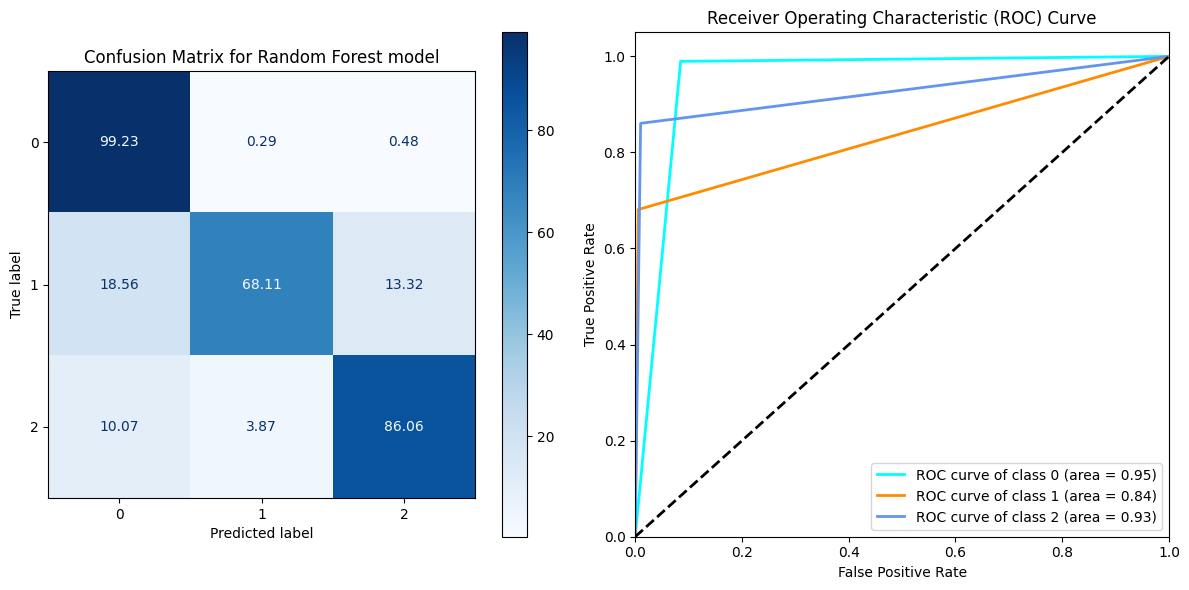

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     61958
           1       0.83      0.68      0.75      2672
           2       0.87      0.86      0.87      5251

    accuracy                           0.97     69881
   macro avg       0.89      0.84      0.87     69881
weighted avg       0.97      0.97      0.97     69881

Precision: [0.9836021  0.82614616 0.87408124]
Recall: [0.99233352 0.68113772 0.86059798]
F1 Score: [0.98794852 0.74666667 0.86728721]


In [39]:
# Convert predicted probabilities to class labels
y_test2_predicted_classes = np.argmax(y_test2_predicted, axis=1)
y_test2_true_classes = np.argmax(y_test_one_hot, axis=1)  # If y_test2 is one-hot encoded

# Calculate the confusion matrix
cm = confusion_matrix(y_test2_true_classes, y_test2_predicted_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Binarize the output labels for ROC
y_test2_binarized = label_binarize(y_test2_true_classes, classes=[0, 1, 2])
n_classes = y_test2_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2_binarized[:, i], y_test2_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, ax=ax1, values_format='.2f')
ax1.set_title('Confusion Matrix for Random Forest model')

# Plot ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    ax2.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax2.plot([0, 1], [0, 1], 'k--', lw=2)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Rapport de classification
report = classification_report(y_test2_true_classes, y_test2_predicted_classes, target_names=[str(i) for i in range(3)])
print("Classification Report:\n", report)

# Scores précision, rappel, F1 pour chaque classe
precision, recall, f1, _ = precision_recall_fscore_support(y_test2_true_classes, y_test2_predicted_classes)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

predict whole X

In [40]:
y_pred2=RF.predict(X_scaled)
RF.score(X_scaled, y_one_hot)


0.9897138833953916

C:\Users\maale\AppData\Local\Temp\ipykernel_18560\405488869.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df2['X'], df2['Y'], c=y_pred2, cmap=cmapClassForestsandShortV,s=5)


Text(0.5, 1.0, 'Forests and Short vegetation\n 2019 Random Forest model prediction')

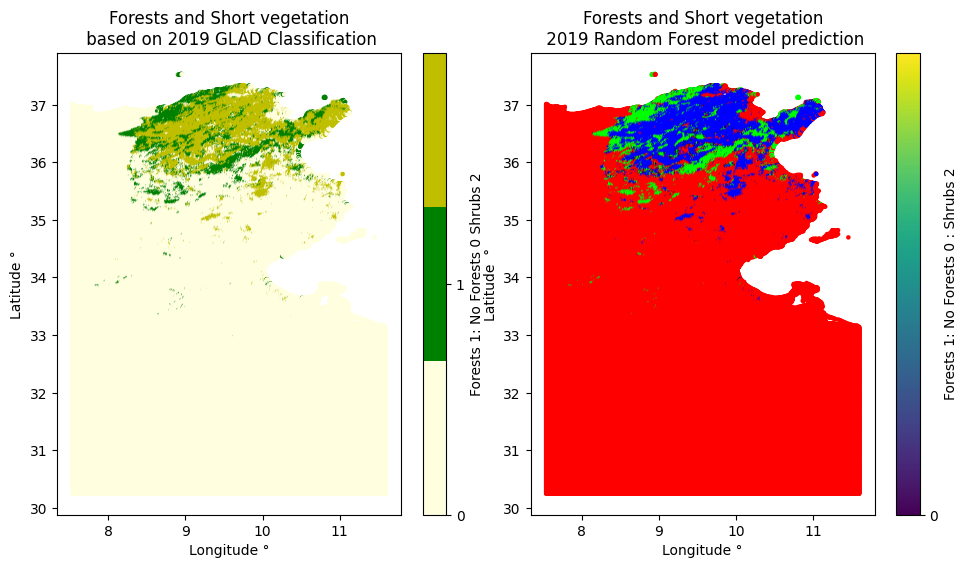

In [41]:
fig= plt.figure(figsize=(30, 6)) 
plt.subplots_adjust(wspace=0.1)  

cmapClassForests = ListedColormap(['lightyellow', 'green'])  # lightyellow for 0 (non-forest), Green for 1 (forest)
cmapClassForestsandShrubs = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for shrubs (in ESA WC only)
cmapClassForestsandShortV = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for short vegetation (in GLAD only)
cmapClassGLAD2010TreeCover= ListedColormap(['lightyellow','green'])  # lightyellow for 0 (non-forest), Green for 1 (open forest) and y for dense forest (There is no dense forests)
plt.subplot(1, 5, 1)
plt.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 1], label='Forests 1: No Forests 0 Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n based on 2019 GLAD Classification')



plt.subplot(1, 5, 2) 
plt.scatter(df2['X'], df2['Y'], c=y_pred2, cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 2], label='Forests 1: No Forests 0 : Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude  °')
plt.title('Forests and Short vegetation\n 2019 Random Forest model prediction')

predict future vegetation

In [42]:
y_fut_RF=RF.predict(X_fut_scaled)


C:\Users\maale\AppData\Local\Temp\ipykernel_18560\2540107576.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df2['X'], df2['Y'], c=y_fut_RF, cmap=cmapClassForestsandShortV,s=5)


Text(0.5, 1.0, 'Forests and Short vegetation\n 2041 Random Forest model prediction')

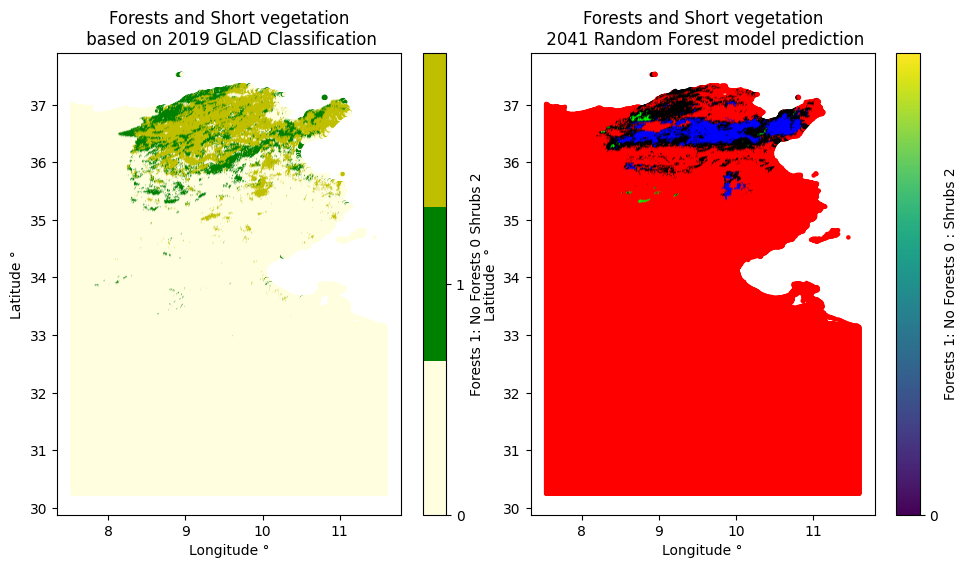

In [43]:
fig= plt.figure(figsize=(30, 6)) 
plt.subplots_adjust(wspace=0.1)  

cmapClassForests = ListedColormap(['lightyellow', 'green'])  # lightyellow for 0 (non-forest), Green for 1 (forest)
cmapClassForestsandShrubs = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for shrubs (in ESA WC only)
cmapClassForestsandShortV = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for short vegetation (in GLAD only)
cmapClassGLAD2010TreeCover= ListedColormap(['lightyellow','green'])  # lightyellow for 0 (non-forest), Green for 1 (open forest) and y for dense forest (There is no dense forests)
plt.subplot(1, 5, 1)
plt.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 1], label='Forests 1: No Forests 0 Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n based on 2019 GLAD Classification')



plt.subplot(1, 5, 2) 
plt.scatter(df2['X'], df2['Y'], c=y_fut_RF, cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 2], label='Forests 1: No Forests 0 : Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude  °')
plt.title('Forests and Short vegetation\n 2041 Random Forest model prediction')

* After sampling the data

predict with sampled training data

In [44]:
RF_us = RandomForestClassifier(n_estimators=500, criterion='gini',max_depth=20, random_state=0, min_samples_split=2
                                ,min_samples_leaf=1, max_features='sqrt', bootstrap=False)
RF_us.fit(X_train_sc_us, y_train_us_one_hot)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=500,
                       random_state=0)

In [45]:
y_test2_predicted_us=RF_us.predict(X_test_scaled)
RF_us.score(X_test_scaled, y_test_one_hot)

0.9447918604484767

Confusion matrix and ROC curve after sampled data

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     61958
           1       0.61      0.80      0.69      2672
           2       0.72      0.93      0.81      5251

    accuracy                           0.95     69881
   macro avg       0.78      0.89      0.83     69881
weighted avg       0.96      0.95      0.95     69881

Precision: [0.99641337 0.61096756 0.72385621]
Recall: [0.95955325 0.79640719 0.92801371]
F1 Score: [0.97763599 0.69147035 0.81331887]


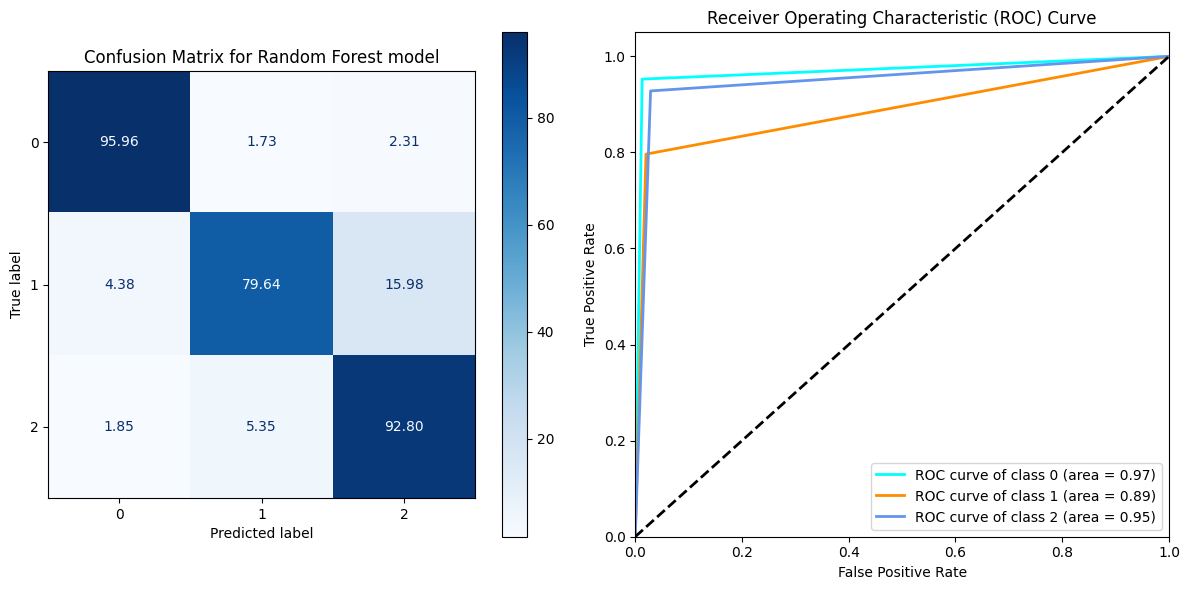

Macro-averaged Precision: 0.7770790445338145
Macro-averaged Recall: 0.8946580476832761
Macro-averaged F1 Score: 0.8274750702008463
Mean TSS: 0.8693464832408947


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

# Convert predicted probabilities to class labels
y_test2_predicted_us_classes = np.argmax(y_test2_predicted_us, axis=1)
y_test2_true_classes = np.argmax(y_test_one_hot, axis=1)  # If y_test2 is one-hot encoded

# Calculate the confusion matrix
cm = confusion_matrix(y_test2_true_classes, y_test2_predicted_us_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Rapport de classification
report = classification_report(y_test2_true_classes, y_test2_predicted_us_classes, target_names=[str(i) for i in range(3)])
print("Classification Report:\n", report)

# Scores précision, rappel, F1 pour chaque classe
precision, recall, f1, _ = precision_recall_fscore_support(y_test2_true_classes, y_test2_predicted_us_classes)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Binarize the output labels for ROC
y_test2_binarized = label_binarize(y_test2_true_classes, classes=[0, 1, 2])
n_classes = y_test2_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2_binarized[:, i], y_test2_predicted_us[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, ax=axs[0], values_format='.2f')
axs[0].set_title('Confusion Matrix for Random Forest model')

# Plot ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")


plt.tight_layout()
plt.show()


# Calculate macro-average of precision, recall, and F1 score
precision_macro = np.mean(precision)
recall_macro = np.mean(recall)
f1_macro = np.mean(f1)

print("Macro-averaged Precision:", precision_macro)
print("Macro-averaged Recall:", recall_macro)
print("Macro-averaged F1 Score:", f1_macro)


# Calculate and print the mean TSS
tss = calculate_tss_multiclass(y_test2_true_classes, y_test2_predicted_us_classes)
print("Mean TSS:", tss)


Feature importance for RF model

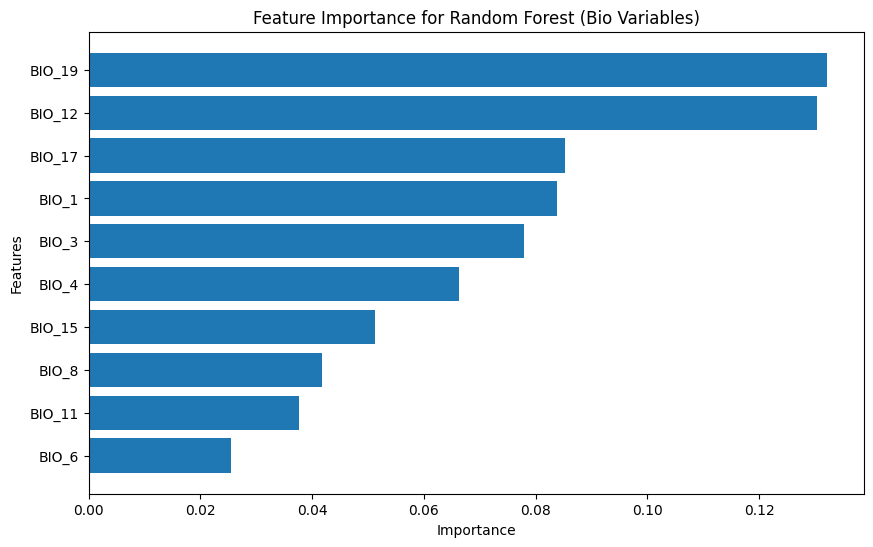

In [47]:
import matplotlib.pyplot as plt

bio_features = [col for col in X_train.columns if col not in ['X', 'Y']]
bio_indices = [i for i, col in enumerate(X_train.columns) if col in bio_features]

if hasattr(RF_us, 'feature_importances_'):
    bio_importances = RF_us.feature_importances_[bio_indices]
    sorted_idx = bio_importances.argsort()

    plt.figure(figsize=(10, 6))
    plt.barh([bio_features[i] for i in sorted_idx], bio_importances[sorted_idx])
    plt.title('Feature Importance for Random Forest (Bio Variables)')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()


In [48]:
y_fut=RF_us.predict(X_fut_scaled)


Predicting future distrubution

C:\Users\maale\AppData\Local\Temp\ipykernel_18560\278043359.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df2['X'], df2['Y'], c=y_fut, cmap=cmapClassForestsandShortV,s=5)


Text(0.5, 1.0, 'Forests and Short vegetation\n 2041 Random Forest model prediction')

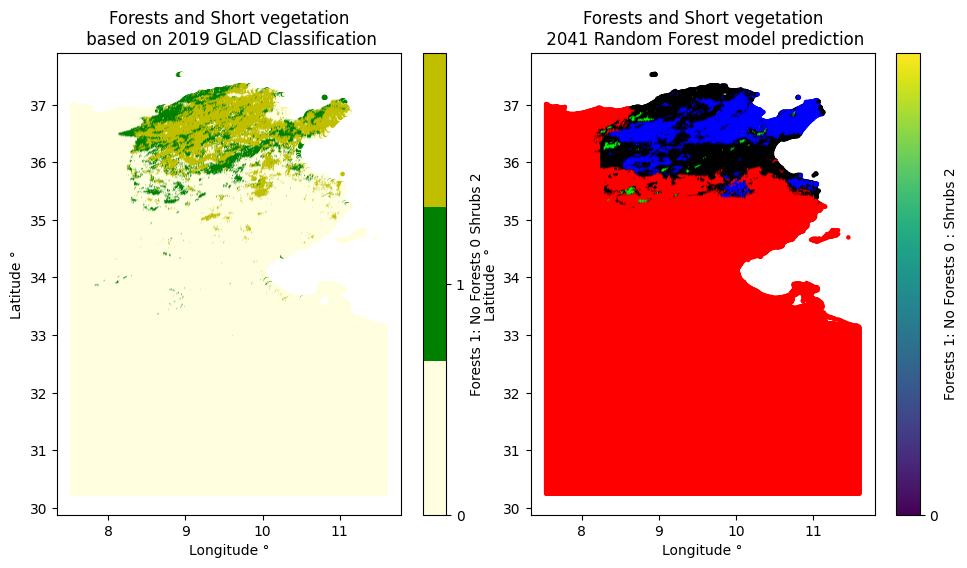

In [49]:
fig= plt.figure(figsize=(30, 6)) 
plt.subplots_adjust(wspace=0.1)  

cmapClassForests = ListedColormap(['lightyellow', 'green'])  # lightyellow for 0 (non-forest), Green for 1 (forest)
cmapClassForestsandShrubs = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for shrubs (in ESA WC only)
cmapClassForestsandShortV = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for short vegetation (in GLAD only)
cmapClassGLAD2010TreeCover= ListedColormap(['lightyellow','green'])  # lightyellow for 0 (non-forest), Green for 1 (open forest) and y for dense forest (There is no dense forests)
plt.subplot(1, 5, 1)
plt.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 1], label='Forests 1: No Forests 0 Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n based on 2019 GLAD Classification')



plt.subplot(1, 5, 2) 
plt.scatter(df2['X'], df2['Y'], c=y_fut, cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 2], label='Forests 1: No Forests 0 : Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude  °')
plt.title('Forests and Short vegetation\n 2041 Random Forest model prediction')

        3-3 XG Boost model

Grid search to get best parameters

In [50]:
"""from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier(objective='binary:logistic')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [ 100, 200,300,500],
    'max_depth': [3, 4, 5, 6,10],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'gamma': [0, 0.1, 0.2, 0.3,0.4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1,0.2],
    'reg_lambda': [0.5,1, 1.5, 2]
}

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(estimator=xgb_model,  param_distributions=param_grid, 
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_sc_us, y_train_us_one_hot)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")"""


'from sklearn.model_selection import RandomizedSearchCV\nfrom xgboost import XGBClassifier\n\n# Define the model\nxgb_model = XGBClassifier(objective=\'binary:logistic\')\n\n# Define the hyperparameters grid\nparam_grid = {\n    \'n_estimators\': [ 100, 200,300,500],\n    \'max_depth\': [3, 4, 5, 6,10],\n    \'learning_rate\': [0.01, 0.1, 0.2,0.3],\n    \'gamma\': [0, 0.1, 0.2, 0.3,0.4],\n    \'subsample\': [0.8, 0.9, 1.0],\n    \'colsample_bytree\': [0.8, 0.9, 1.0],\n    \'reg_alpha\': [0, 0.01, 0.1,0.2],\n    \'reg_lambda\': [0.5,1, 1.5, 2]\n}\n\n# Initialize GridSearchCV\ngrid_search = RandomizedSearchCV(estimator=xgb_model,  param_distributions=param_grid, \n                           scoring=\'roc_auc\', cv=5, verbose=2, n_jobs=-1)\n\n# Fit the model\ngrid_search.fit(X_train_sc_us, y_train_us_one_hot)\n\n# Get the best parameters and best score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint(f"Best Parameters: {best_params}")\nprint(f"Best Sc

Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.2, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [51]:
from xgboost import XGBClassifier

# Define the best parameters found from RandomizedSearchCV
best_params = {
    'subsample': 1,
    'reg_lambda': 1,
    'reg_alpha': 0.2,
    'n_estimators': 100,
    'max_depth': 10,
    'learning_rate': 0.1,
    'gamma': 0.2,
    'colsample_bytree': 0.8
}

# Create XGBoost model with best parameters
xgb_model = XGBClassifier(
    objective='binary:logistic',
    subsample=best_params['subsample'],
    reg_lambda=best_params['reg_lambda'],
    reg_alpha=best_params['reg_alpha'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    gamma=best_params['gamma'],
    colsample_bytree=best_params['colsample_bytree'],
    eval_metric='logloss'
)

# Fit the model
xgb_model.fit(X_train_sc_us, y_train_us_one_hot)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [52]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

xgb_model.score(X_test_scaled, y_test_one_hot)


0.9358480846009645

Confusion matrix and ROC curve for XGBoost

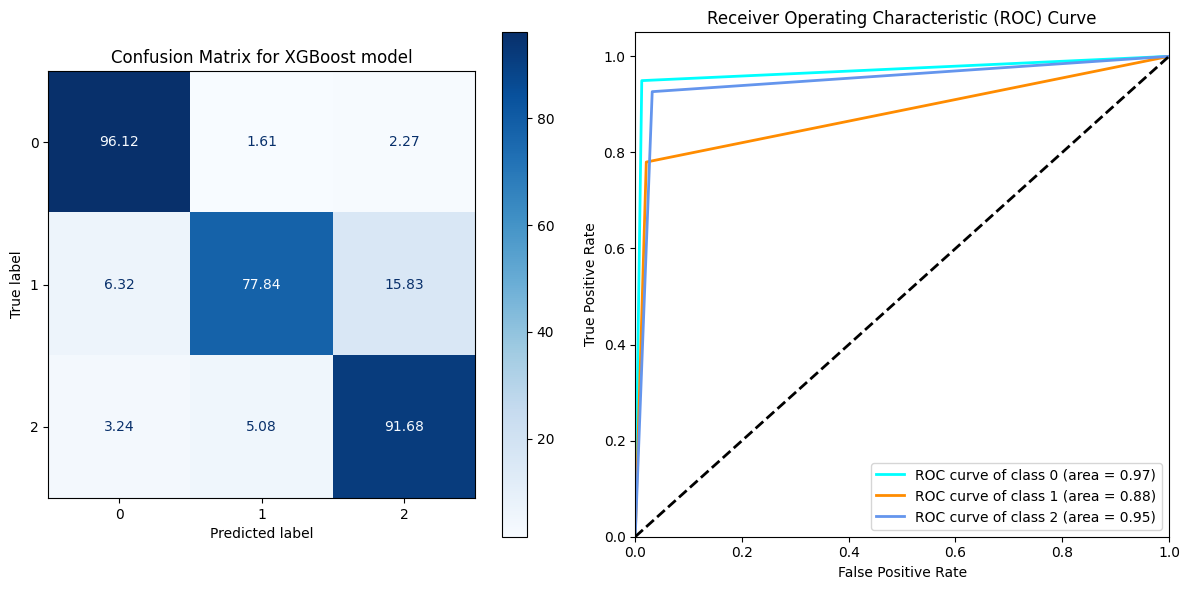

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     61958
           1       0.62      0.78      0.69      2672
           2       0.72      0.92      0.81      5251

    accuracy                           0.95     69881
   macro avg       0.78      0.89      0.83     69881
weighted avg       0.96      0.95      0.95     69881

Precision: [0.99433962 0.62182362 0.72434547]
Recall: [0.9611511  0.77844311 0.91677776]
F1 Score: [0.97746373 0.69137444 0.80927965]
Macro-averaged Precision: 0.7801695703135992
Macro-averaged Recall: 0.8854573242499684
Macro-averaged F1 Score: 0.826039271572785
Mean TSS: 0.85547243207964


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

# Convert predicted probabilities to class labels
y_test_predicted_classes = np.argmax(y_pred_xgb, axis=1)
y_test_true_classes = np.argmax(y_test_one_hot, axis=1)  # If y_test is one-hot encoded

# Calculate the confusion matrix
cm = confusion_matrix(y_test_true_classes, y_test_predicted_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Binarize the output labels for ROC
y_test_binarized = label_binarize(y_test_true_classes, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, ax=axs[0], values_format='.2f')
axs[0].set_title('Confusion Matrix for XGBoost model')

# Plot ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[1].legend(loc="lower right")


plt.tight_layout()
plt.show()

# Rapport de classification
report = classification_report(y_test_true_classes, y_test_predicted_classes, target_names=[str(i) for i in range(3)])
print("Classification Report:\n", report)

# Scores précision, rappel, F1 pour chaque classe
precision, recall, f1, _ = precision_recall_fscore_support(y_test_true_classes, y_test_predicted_classes)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate macro-average of precision, recall, and F1 score
precision_macro = np.mean(precision)
recall_macro = np.mean(recall)
f1_macro = np.mean(f1)

print("Macro-averaged Precision:", precision_macro)
print("Macro-averaged Recall:", recall_macro)
print("Macro-averaged F1 Score:", f1_macro)




tss = calculate_tss_multiclass(y_test_true_classes, y_test_predicted_classes)
print("Mean TSS:", tss)


Feature importance for XGBoost

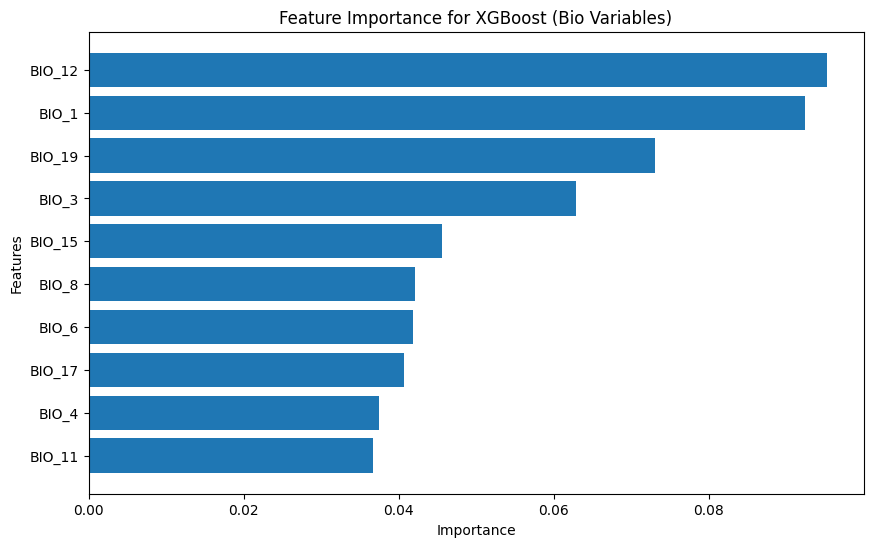

In [54]:
import matplotlib.pyplot as plt

bio_features = [col for col in X_train.columns if col not in ['X', 'Y']]
bio_indices = [i for i, col in enumerate(X_train.columns) if col in bio_features]

if hasattr(xgb_model, 'feature_importances_'):
    bio_importances = xgb_model.feature_importances_[bio_indices]
    sorted_idx = bio_importances.argsort()

    plt.figure(figsize=(10, 6))
    plt.barh([bio_features[i] for i in sorted_idx], bio_importances[sorted_idx])
    plt.title('Feature Importance for XGBoost (Bio Variables)')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()






In [55]:
y_xgb= xgb_model.predict(X_scaled)
y_fut_xgb=xgb_model.predict(X_fut_scaled)

Predicting current distribution

C:\Users\maale\AppData\Local\Temp\ipykernel_18560\466863286.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df2['X'], df2['Y'], c=y_xgb, cmap=cmapClassForestsandShortV,s=5)


Text(0.5, 1.0, 'Forests and Short vegetation\n 2019 XGBoost model prediction')

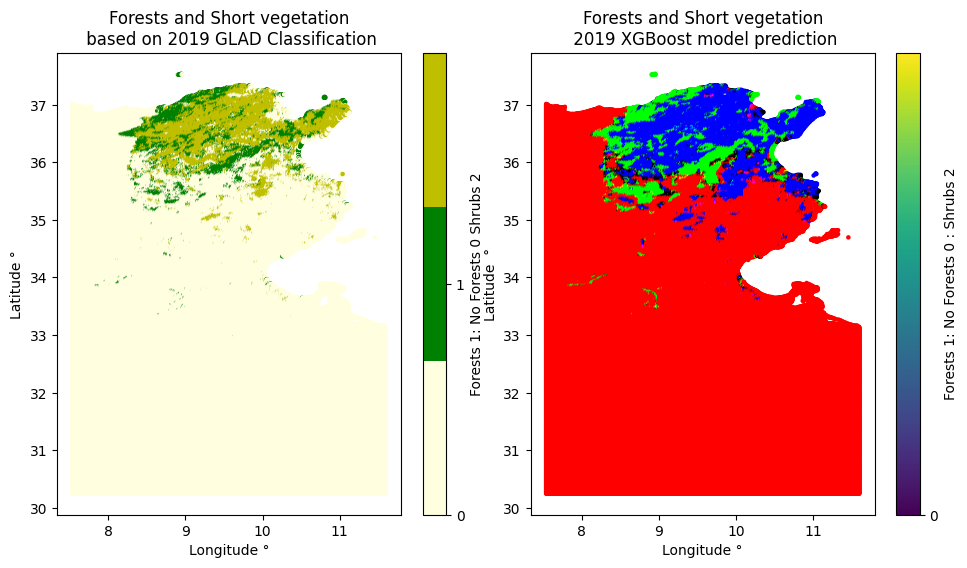

In [56]:
fig= plt.figure(figsize=(30, 6)) 
plt.subplots_adjust(wspace=0.1)  

cmapClassForests = ListedColormap(['lightyellow', 'green'])  # lightyellow for 0 (non-forest), Green for 1 (forest)
cmapClassForestsandShrubs = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for shrubs (in ESA WC only)
cmapClassForestsandShortV = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for short vegetation (in GLAD only)
cmapClassGLAD2010TreeCover= ListedColormap(['lightyellow','green'])  # lightyellow for 0 (non-forest), Green for 1 (open forest) and y for dense forest (There is no dense forests)
plt.subplot(1, 5, 1)
plt.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 1], label='Forests 1: No Forests 0 Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n based on 2019 GLAD Classification')


plt.subplot(1, 5, 2) 
plt.scatter(df2['X'], df2['Y'], c=y_xgb, cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 2], label='Forests 1: No Forests 0 : Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude  °')
plt.title('Forests and Short vegetation\n 2019 XGBoost model prediction')

Predicting future distribution using XGBoost

Shape of y_fut_xgb: (349403, 3)
Unique values in y_fut_xgb: [0. 1.]


C:\Users\maale\AppData\Local\Temp\ipykernel_18560\1932638128.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df2['X'], df2['Y'], c=y_fut_xgb, cmap=cmapClassForestsandShortV, s=5)


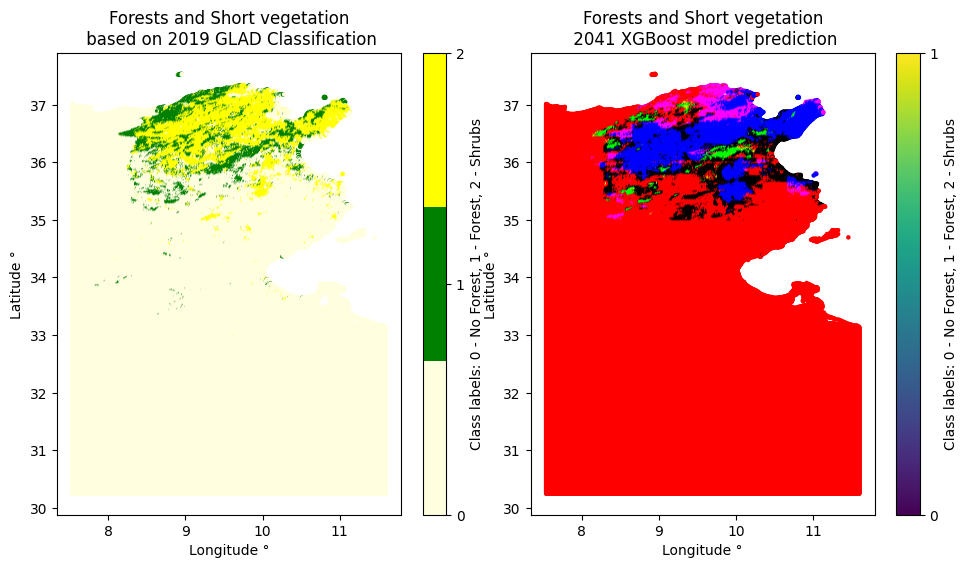

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Check if y_fut_xgb is valid
print("Shape of y_fut_xgb:", y_fut_xgb.shape)
print("Unique values in y_fut_xgb:", np.unique(y_fut_xgb))

# Define the colormap
cmapClassForestsandShortV = ListedColormap(['lightyellow', 'green', 'yellow'])  # Adjusted for 0: Non-forest, 1: Forest, 2: Shrubs

# Create the plot
fig = plt.figure(figsize=(30, 6))
plt.subplots_adjust(wspace=0.1)

# Plot 1: 2019 GLAD Classification
plt.subplot(1, 5, 1)
plt.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV, s=5)
plt.colorbar(ticks=[0, 1, 2], label='Class labels: 0 - No Forest, 1 - Forest, 2 - Shrubs')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n based on 2019 GLAD Classification')
# Plot 2: 2041 XGBoost model prediction
plt.subplot(1, 5, 2)
plt.scatter(df2['X'], df2['Y'], c=y_fut_xgb, cmap=cmapClassForestsandShortV, s=5)
plt.colorbar(ticks=[0, 1, 2], label='Class labels: 0 - No Forest, 1 - Forest, 2 - Shrubs')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n 2041 XGBoost model prediction')

plt.show()


    3-4 Performing ANN model

 * ANN model using sampling training data

In [58]:
from tensorflow.keras.models import Sequential #ignore
from tensorflow.keras.layers import Dense #ignore
from tensorflow.keras.regularizers import l2 #ignore


# Définir la graine aléatoire pour des résultats cohérents
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Fonction pour créer le modèle
def create_model():
    model = Sequential([
        tf.keras.Input(shape=(12,)),
        Dense(32, activation="relu", kernel_regularizer=l2(0.02)),
        Dense(16, activation="relu", kernel_regularizer=l2(0.02)),
        Dense(8, activation="relu", kernel_regularizer=l2(0.02)),
        Dense(3, activation="softmax")
    ])
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )
    return model

In [59]:
# CREATE THE MODEL
ANN_model_us = create_model()


# Train the model
history2 = ANN_model_us.fit( X_train_sc_us,y_train_us,epochs=50,validation_split=0.2)


Epoch 1/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6936 - loss: 1.2984 - val_accuracy: 0.6354 - val_loss: 0.9162
Epoch 2/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.7854 - loss: 0.6370 - val_accuracy: 0.6542 - val_loss: 0.8379
Epoch 3/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.7957 - loss: 0.5835 - val_accuracy: 0.7000 - val_loss: 0.7775
Epoch 4/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8094 - loss: 0.5595 - val_accuracy: 0.7308 - val_loss: 0.7417
Epoch 5/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8207 - loss: 0.5441 - val_accuracy: 0.7482 - val_loss: 0.7209
Epoch 6/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.8244 - loss: 0.5332 - val_accuracy: 0.7561 - val_loss: 0.7051
Epoch 7/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.8287 - loss: 0.5249 - val_accuracy: 0.7608 - val_loss: 0.6959
Epoch 8/50
1293/1293 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.8303 - loss:

In [60]:
y_score_ANN_us=ANN_model_us.predict(X_test_scaled)
y_test_pred_ANN_us=np.argmax(y_score_ANN_us, axis=-1)
ANN_model_us.evaluate(X_test_scaled, y_test)


2184/2184 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step
2184/2184 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.9097 - loss: 0.2975


[0.2953360080718994, 0.910905659198761]

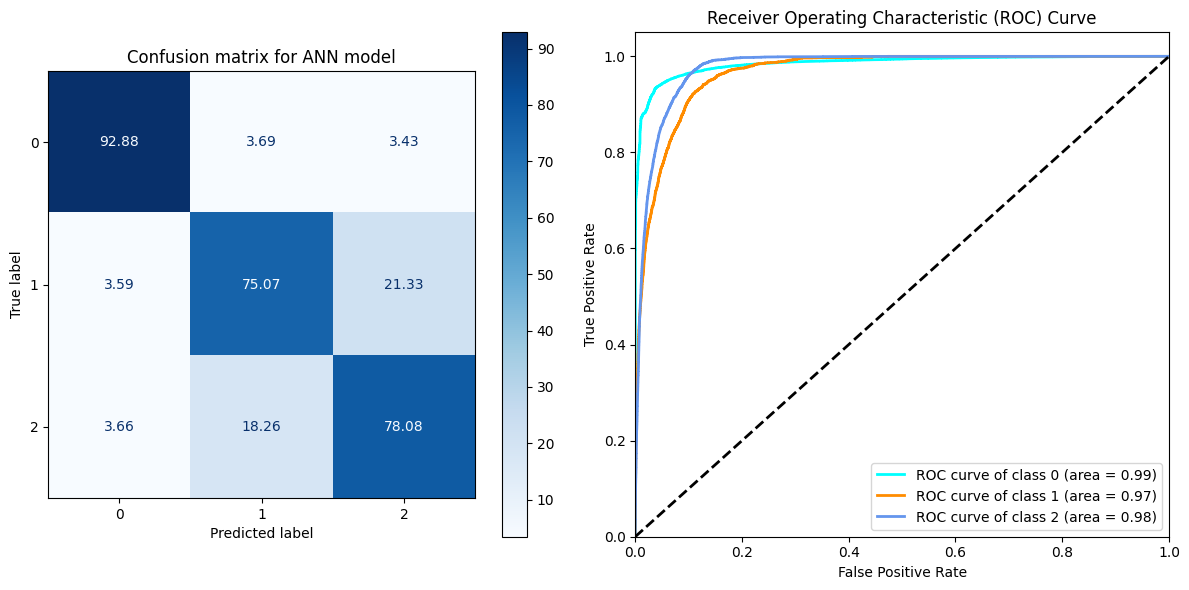

<Figure size 640x480 with 0 Axes>

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     61958
           1       0.38      0.75      0.51      2672
           2       0.60      0.78      0.68      5251

    accuracy                           0.91     69881
   macro avg       0.66      0.82      0.72     69881
weighted avg       0.94      0.91      0.92     69881

Precision: [0.99502049 0.38209524 0.60347365]
Recall: [0.92883889 0.7507485  0.78080366]
F1 Score: [0.96079135 0.50643777 0.68078041]
Macro-averaged Precision: 0.6601964599777418
Macro-averaged Recall: 0.8201303501006515
Macro-averaged F1 Score: 0.7160031756469882
Mean TSS: 0.7780301363106754


In [61]:


# Calculate the confusion matrix
cm2 = confusion_matrix(y_test,y_test_pred_ANN_us)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis] * 100
# Binarize the output labels for ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]
 
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_ANN_us[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, ax=ax1, values_format='.2f')
ax1.set_title('Confusion matrix for ANN model')

# Plot ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    ax2.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax2.plot([0, 1], [0, 1], 'k--', lw=2)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()



# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, ax=ax1, values_format='.2f')



ax1.set_title('Confusion matrix for ANN model')

# Plot ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    ax2.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax2.plot([0, 1], [0, 1], 'k--', lw=2)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Rapport de classification
report = classification_report(y_test, y_test_pred_ANN_us, target_names=[str(i) for i in range(3)])
print("Classification Report:\n", report)

# Scores précision, rappel, F1 pour chaque classe
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_ANN_us)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate macro-average of precision, recall, and F1 score
precision_macro = np.mean(precision)
recall_macro = np.mean(recall)
f1_macro = np.mean(f1)

print("Macro-averaged Precision:", precision_macro)
print("Macro-averaged Recall:", recall_macro)
print("Macro-averaged F1 Score:", f1_macro)



tss = calculate_tss_multiclass(y_test, y_test_pred_ANN_us)
print("Mean TSS:", tss)

Text(0.5, 1.0, 'Forests and Short vegetation\n 2019 ANN model prediction')

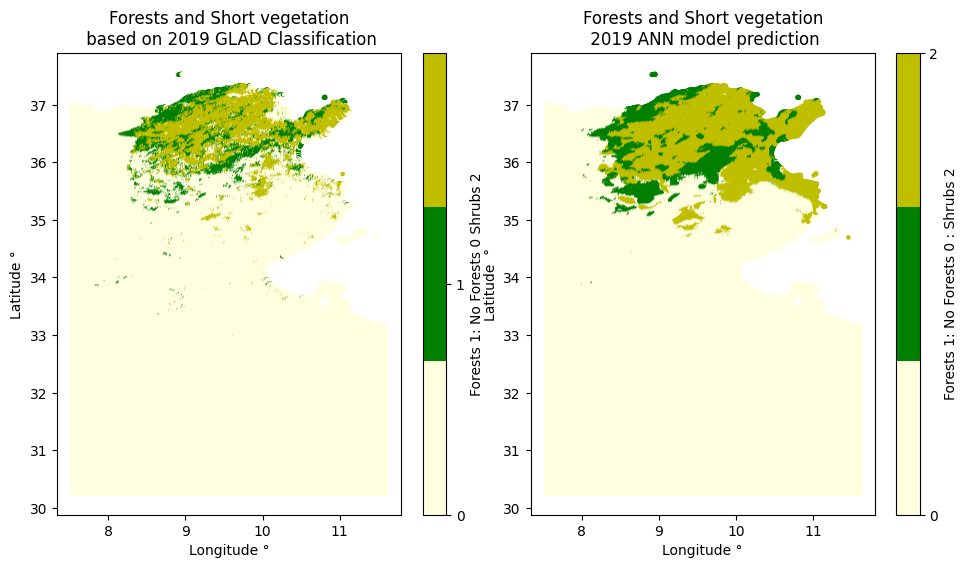

In [62]:
fig= plt.figure(figsize=(30, 6)) 
plt.subplots_adjust(wspace=0.1)  

cmapClassForests = ListedColormap(['lightyellow', 'green'])  # lightyellow for 0 (non-forest), Green for 1 (forest)
cmapClassForestsandShrubs = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for shrubs (in ESA WC only)
cmapClassForestsandShortV = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for short vegetation (in GLAD only)
cmapClassGLAD2010TreeCover= ListedColormap(['lightyellow','green'])  # lightyellow for 0 (non-forest), Green for 1 (open forest) and y for dense forest (There is no dense forests)
plt.subplot(1, 5, 1)
plt.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 1], label='Forests 1: No Forests 0 Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n based on 2019 GLAD Classification')



plt.subplot(1, 5, 2) 
plt.scatter(df['X'], df['Y'], c=y_pred, cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 2], label='Forests 1: No Forests 0 : Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude  °')
plt.title('Forests and Short vegetation\n 2019 ANN model prediction')

In [63]:
print(X_fut_scaled.shape)
y_fut=ANN_model_us.predict(X_fut_scaled)
y_fut=np.argmax(y_fut, axis=-1)

(349403, 12)
10919/10919 ━━━━━━━━━━━━━━━━━━━━ 5s 474us/step


Text(0.5, 1.0, 'Forests and Short vegetation\n 2041 ANN model prediction ssp585 scenario')

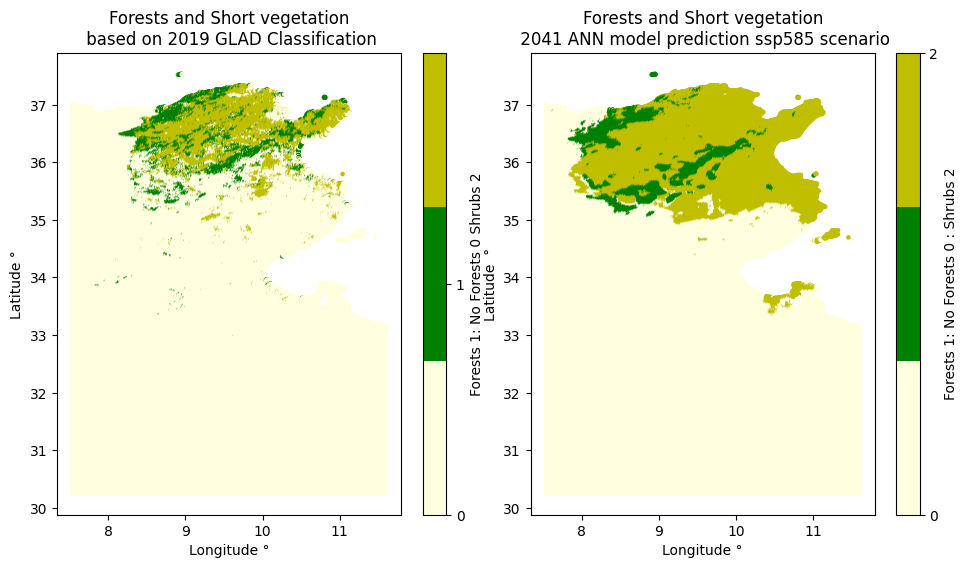

In [64]:
fig= plt.figure(figsize=(30, 6)) 
plt.subplots_adjust(wspace=0.1)  

cmapClassForests = ListedColormap(['lightyellow', 'green'])  # lightyellow for 0 (non-forest), Green for 1 (forest)
cmapClassForestsandShrubs = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for shrubs (in ESA WC only)
cmapClassForestsandShortV = ListedColormap(['lightyellow','green','y'])  # lightyellow for 0 (non-forest), Green for 1 (forest) and y for short vegetation (in GLAD only)
cmapClassGLAD2010TreeCover= ListedColormap(['lightyellow','green'])  # lightyellow for 0 (non-forest), Green for 1 (open forest) and y for dense forest (There is no dense forests)
plt.subplot(1, 5, 1)
plt.scatter(df['X'], df['Y'], c=df['GLAD2019'], cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 1], label='Forests 1: No Forests 0 Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude °')
plt.title('Forests and Short vegetation\n based on 2019 GLAD Classification')



plt.subplot(1, 5, 2) 
plt.scatter(df2['X'], df2['Y'], c=y_fut, cmap=cmapClassForestsandShortV,s=5)
plt.colorbar(ticks=[0, 2], label='Forests 1: No Forests 0 : Shrubs 2')
plt.xlabel('Longitude °')
plt.ylabel('Latitude  °')
plt.title('Forests and Short vegetation\n 2041 ANN model prediction ssp585 scenario')